In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\INTELLIPAAT\CSGO Project\csgo_round_snapshots.csv")
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


# EDA

### checking Errors in the data  (checking datatype)
### checking null values
### checking the Duplicate
### checking the outliers
### data preprocessing (label Encoding,data scaling )
### Feature Selection
### Model Building
### testing model
### evaluating the performance

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum()

4962

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#Outlier removal
'''for col in df.columns:
    if (df[col].dtypes != 'object') | (df[col].dtypes != 'bool'):
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3-Q1
        UB = Q3 + 1.5 * IQR
        LB = Q1 - 1.5 * IQR
        df[col] = (df[df[col] > LB]) & (df[df[col] < UB])
   '''     

"for col in df.columns:\n    if (df[col].dtypes != 'object') | (df[col].dtypes != 'bool'):\n        Q1 = np.quantile(df[col], 0.25)\n        Q3 = np.quantile(df[col], 0.75)\n        IQR = Q3-Q1\n        UB = Q3 + 1.5 * IQR\n        LB = Q1 - 1.5 * IQR\n        df[col] = (df[df[col] > LB]) & (df[df[col] < UB])\n   "

# Data Preprocessing (Label Encoding)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
for col in df.columns:
    if (df[col].dtype == 'object') | (df[col].dtype == 'bool'):
        df[col] = le.fit_transform(df[col])

In [10]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


# Standardization

In [13]:
X = df.drop("round_winner", axis = 1)
Y = df['round_winner']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
scaled_df = sc.fit_transform(X)

In [17]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1.509685,-1.409672,-1.413115,-1.303996,-0.363148,0.683520,0.716735,-1.865404,-1.737687,-0.530630,...,-1.076826,-1.051011,-0.910628,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
1,1.153269,-1.409672,-1.413115,-1.303996,-0.363148,0.683520,0.716735,0.482854,-0.014716,-0.831283,...,-1.076826,-1.051011,-0.910628,0.178864,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
2,0.025964,-1.409672,-1.413115,-1.303996,-0.363148,-0.130929,0.009485,-0.139434,-0.589039,-0.818019,...,-1.076826,-1.051011,-0.910628,0.178864,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
3,-0.349805,-1.409672,-1.413115,-1.303996,-0.363148,-0.130929,0.009485,-0.139434,-0.589039,-0.818019,...,-1.076826,-1.051011,-0.910628,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
4,1.509121,-1.201435,-1.413115,-1.303996,-0.363148,0.683520,0.716735,-0.738240,-1.737687,0.738304,...,-1.076826,-1.051011,-0.910628,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,-1.488758,0.880931,1.483980,1.283219,2.753701,-1.558084,-1.107969,-0.720628,0.324135,-0.875497,...,-0.511658,0.058215,-0.335404,-0.366084,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
117444,1.508370,0.880931,1.690915,1.283219,-0.363148,0.683520,0.716735,-1.307692,-0.732620,0.132576,...,-0.511658,0.058215,-0.335404,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
117445,0.381065,0.880931,1.690915,1.283219,-0.363148,0.683520,0.716735,1.040566,0.990350,-0.778227,...,1.183847,1.167441,0.815045,1.813707,-0.017999,-0.139622,-0.214537,2.161821,-0.16322,-0.154805
117446,0.005297,0.880931,1.690915,1.283219,-0.363148,0.683520,0.716735,1.040566,0.990350,-0.778227,...,-0.511658,1.722054,-0.910628,0.723811,-0.701888,-0.139622,-0.214537,1.563600,-0.16322,-0.154805


# Feature Selection / Feature Extraction

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
LDA = LinearDiscriminantAnalysis()

In [19]:
LDA_DATA = LDA.fit(scaled_df,Y)

In [24]:
lda_coef = np.exp(np.abs(LDA.coef_))
lda_coef

array([[1.15267474, 1.01777818, 1.01455349, 1.08986151, 1.28034675,
        1.57234407, 1.39094438, 1.83135625, 1.88904752, 1.23357161,
        1.17892715, 1.02508531, 1.08520644, 1.03656559, 1.23103563,
        1.46818787, 1.20556524, 1.84270421, 1.22000757, 1.03820605,
        1.35563553, 1.28205659, 1.        , 1.00182075, 1.01669835,
        1.00651808, 1.00454046, 1.01542945, 1.1456622 , 1.04619941,
        1.        , 1.02055724, 1.05037218, 1.14761222, 1.0238966 ,
        1.19254074, 1.01025802, 1.        , 1.09838649, 1.04608239,
        1.57657106, 1.11167244, 1.0105341 , 1.11650081, 1.01652638,
        1.00704743, 1.0133227 , 1.03602036, 1.00650434, 1.00631278,
        1.12167832, 1.03637972, 1.        , 1.00696163, 1.01560732,
        1.01379809, 1.02292652, 1.01815506, 1.        , 1.00602516,
        1.        , 1.01454856, 1.00582189, 1.01100567, 1.22977851,
        1.74564164, 1.08742719, 1.02776903, 1.04814473, 1.09481271,
        1.01743839, 1.00072568, 1.02759341, 1.01

In [25]:
lda_coef = lda_coef.flatten()

In [26]:
lda_coef


array([1.15267474, 1.01777818, 1.01455349, 1.08986151, 1.28034675,
       1.57234407, 1.39094438, 1.83135625, 1.88904752, 1.23357161,
       1.17892715, 1.02508531, 1.08520644, 1.03656559, 1.23103563,
       1.46818787, 1.20556524, 1.84270421, 1.22000757, 1.03820605,
       1.35563553, 1.28205659, 1.        , 1.00182075, 1.01669835,
       1.00651808, 1.00454046, 1.01542945, 1.1456622 , 1.04619941,
       1.        , 1.02055724, 1.05037218, 1.14761222, 1.0238966 ,
       1.19254074, 1.01025802, 1.        , 1.09838649, 1.04608239,
       1.57657106, 1.11167244, 1.0105341 , 1.11650081, 1.01652638,
       1.00704743, 1.0133227 , 1.03602036, 1.00650434, 1.00631278,
       1.12167832, 1.03637972, 1.        , 1.00696163, 1.01560732,
       1.01379809, 1.02292652, 1.01815506, 1.        , 1.00602516,
       1.        , 1.01454856, 1.00582189, 1.01100567, 1.22977851,
       1.74564164, 1.08742719, 1.02776903, 1.04814473, 1.09481271,
       1.01743839, 1.00072568, 1.02759341, 1.01792206, 1.03981

In [27]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

<function matplotlib.pyplot.show(close=None, block=None)>

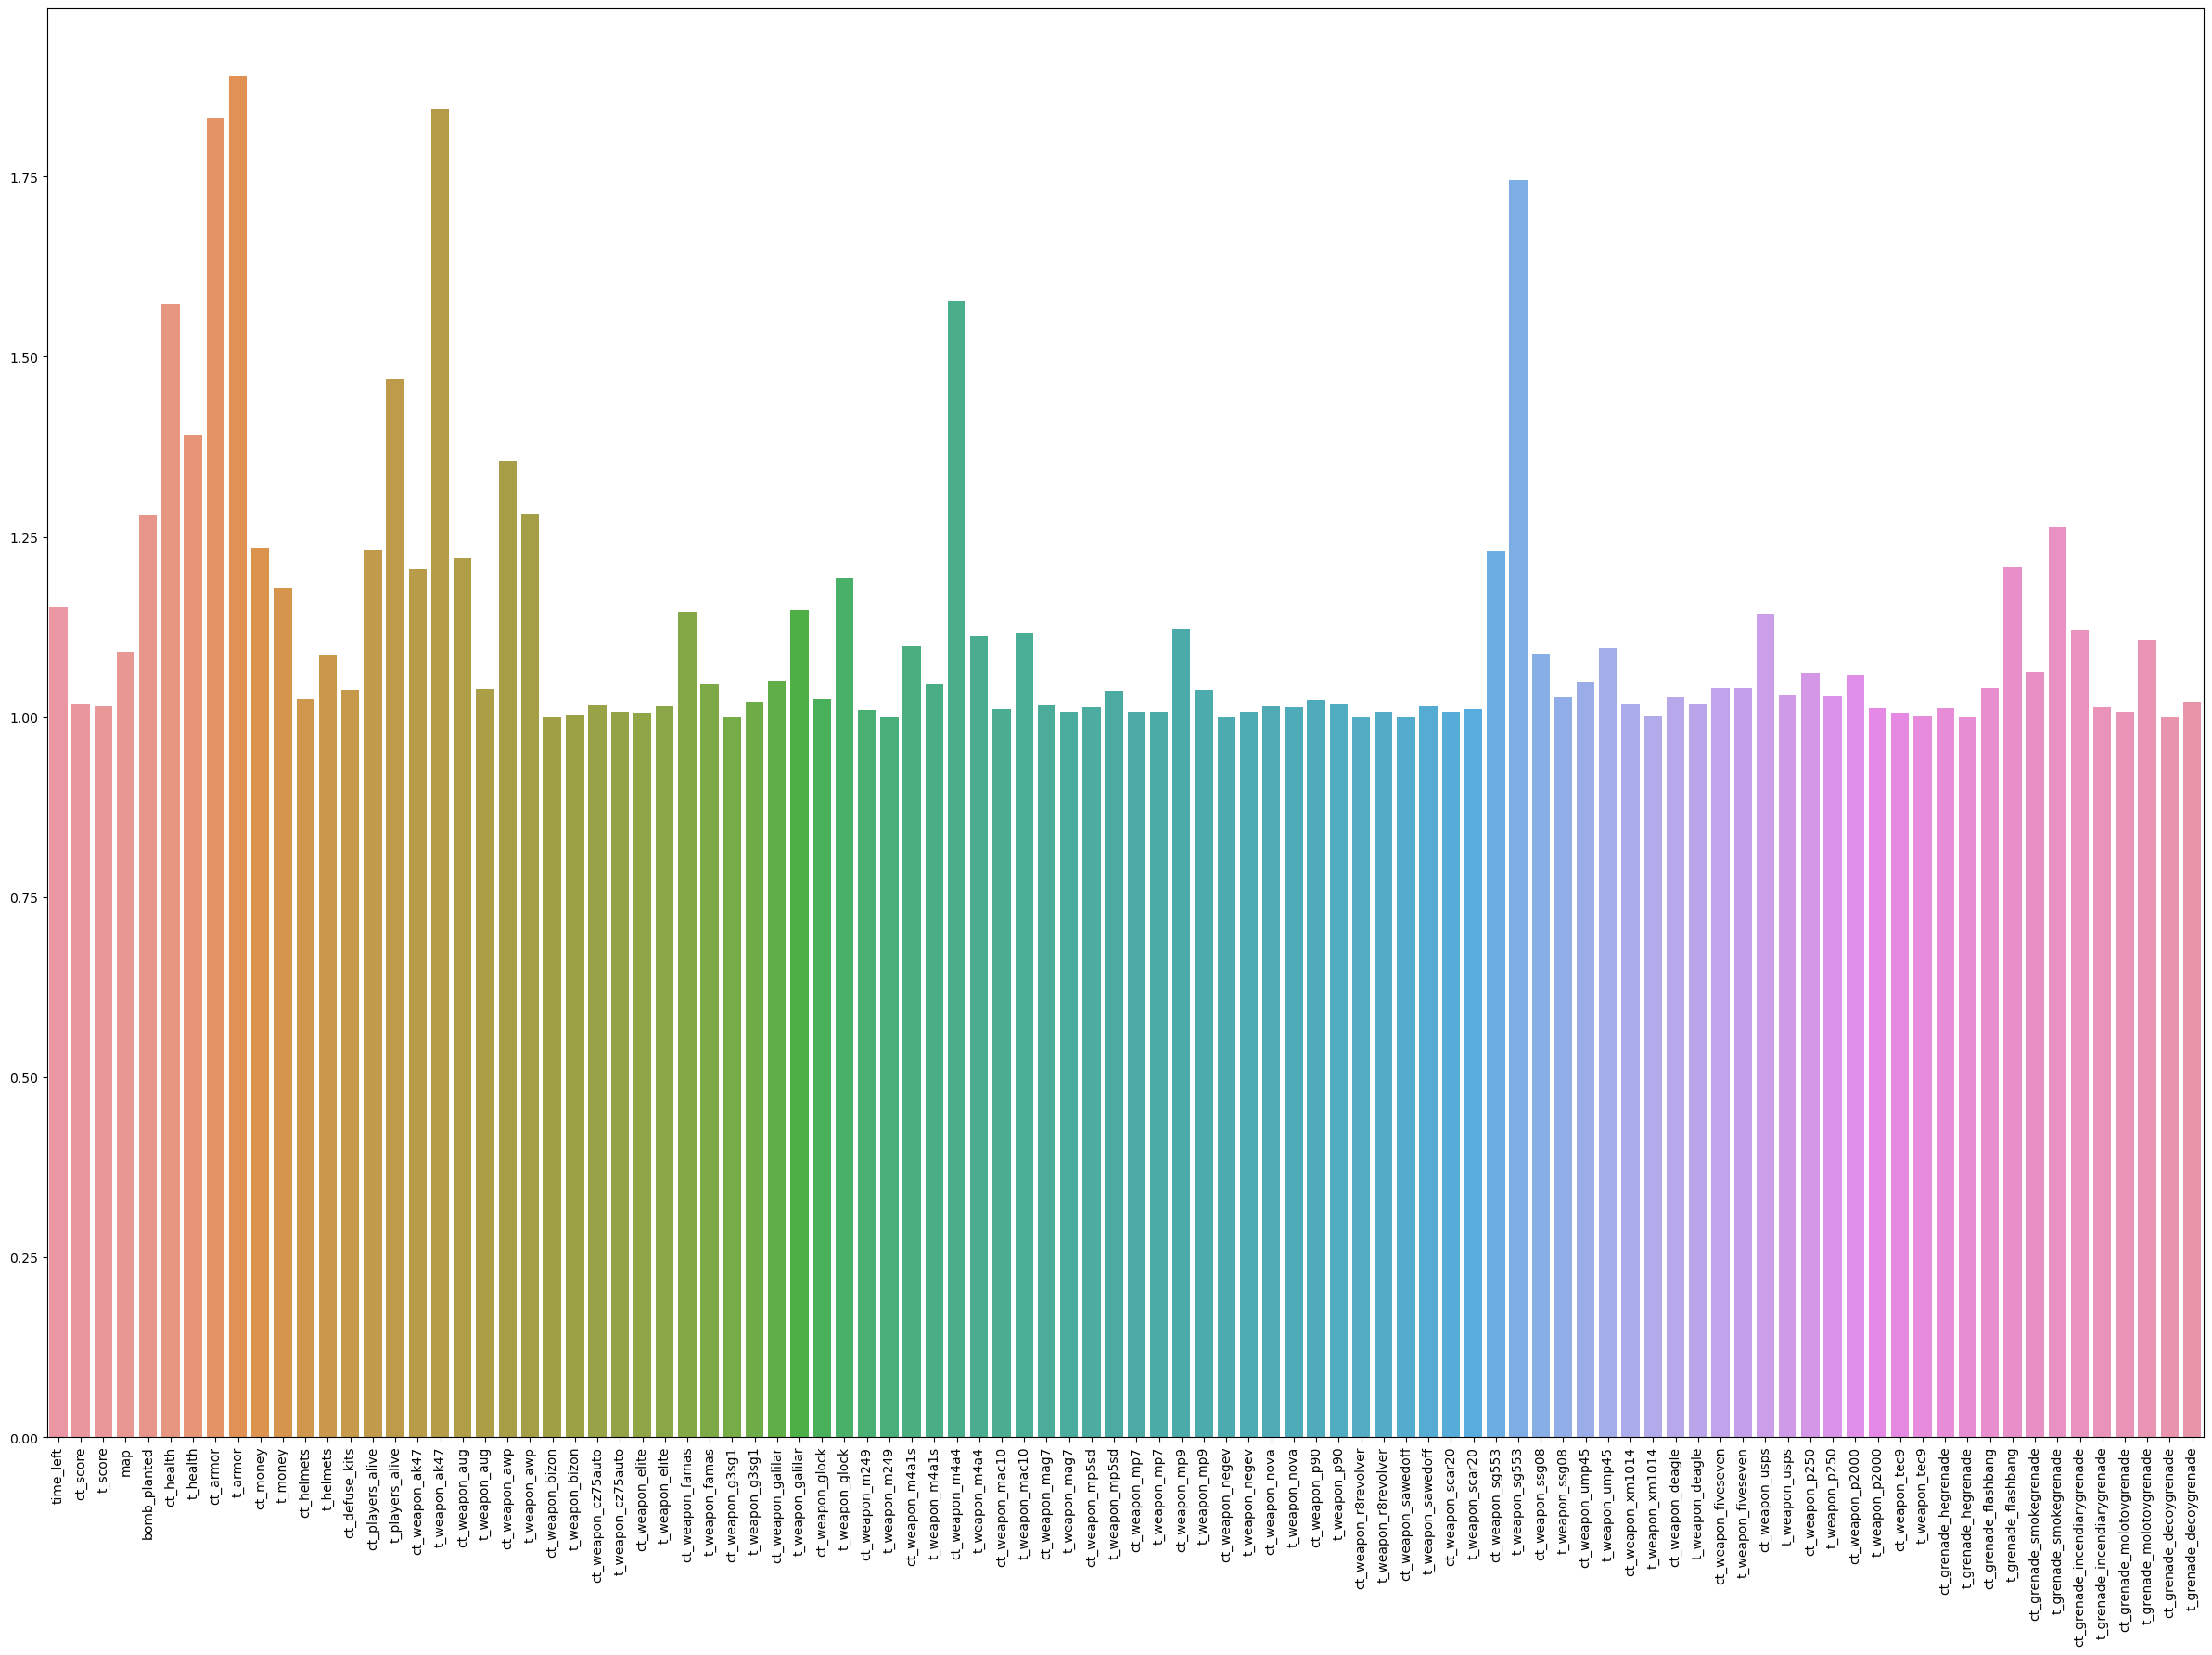

In [31]:
plt.figure(figsize=(30,20))
sns.barplot(y = lda_coef, x=X.columns)
plt.xticks(rotation = 90)
plt.show

In [32]:
df_feature_score = pd.DataFrame({"Features_names":X.columns, "features_score":lda_coef})
df_feature_score

,Features_names,features_score
0,time_left,1.152675
1,ct_score,1.017778
2,t_score,1.014553
3,map,1.089862
4,bomb_planted,1.280347
...,...,...
91,t_grenade_incendiarygrenade,1.013546
92,ct_grenade_molotovgrenade,1.005935
93,t_grenade_molotovgrenade,1.105847
94,ct_grenade_decoygrenade,1.000101


In [33]:
top_20 = df_feature_score.nlargest(20,"features_score")
top_20

,Features_names,features_score
8,t_armor,1.889048
17,t_weapon_ak47,1.842704
7,ct_armor,1.831356
65,t_weapon_sg553,1.745642
40,ct_weapon_m4a4,1.576571
5,ct_health,1.572344
15,t_players_alive,1.468188
6,t_health,1.390944
20,ct_weapon_awp,1.355636
21,t_weapon_awp,1.282057


In [34]:
top_20['Features_names'].values

array(['t_armor', 't_weapon_ak47', 'ct_armor', 't_weapon_sg553',
       'ct_weapon_m4a4', 'ct_health', 't_players_alive', 't_health',
       'ct_weapon_awp', 't_weapon_awp', 'bomb_planted',
       't_grenade_smokegrenade', 'ct_money', 'ct_players_alive',
       'ct_weapon_sg553', 'ct_weapon_aug', 't_grenade_flashbang',
       'ct_weapon_ak47', 't_weapon_glock', 't_money'], dtype=object)

In [37]:
imp_cols=top_20["Features_names"].values
imp_cols

array(['t_armor', 't_weapon_ak47', 'ct_armor', 't_weapon_sg553',
       'ct_weapon_m4a4', 'ct_health', 't_players_alive', 't_health',
       'ct_weapon_awp', 't_weapon_awp', 'bomb_planted',
       't_grenade_smokegrenade', 'ct_money', 'ct_players_alive',
       'ct_weapon_sg553', 'ct_weapon_aug', 't_grenade_flashbang',
       'ct_weapon_ak47', 't_weapon_glock', 't_money'], dtype=object)

In [38]:
X = X[imp_cols]

# Machine Learning

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [46]:
from sklearn.metrics import *

In [47]:
accuracy_score(y_test, y_pred)

0.7489428125443451

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8513409961685824

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8000851426138782